Dataset shape: (418, 12)
   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  
Accuracy: 1.0

Classification Report:
               precisio

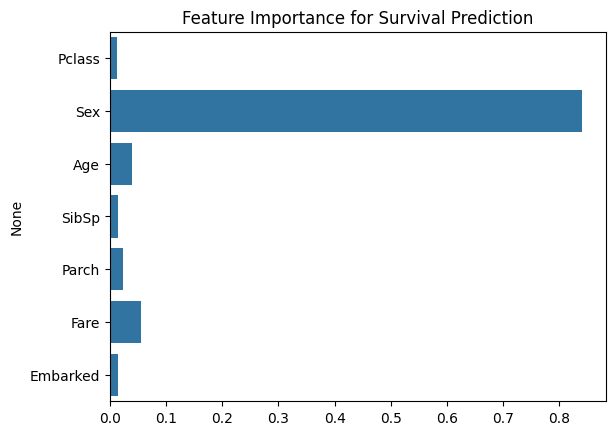

    Survived  Predicted_Survival
0          0                   0
1          1                   1
2          0                   0
3          0                   0
4          1                   1
5          0                   0
6          1                   1
7          0                   0
8          1                   1
9          0                   0
10         0                   0
11         0                   0
12         1                   1
13         0                   0
14         1                   1
15         1                   1
16         0                   0
17         0                   0
18         1                   1
19         1                   1


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load dataset
df = pd.read_csv("tested.csv")
print("Dataset shape:", df.shape)
print(df.head())

# 2. Basic cleaning
# Drop columns that are not useful (adjust depending on dataset structure)
df = df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], errors="ignore")

# Fill missing values
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 3. Encode categorical columns
le = LabelEncoder()
for col in ["Sex", "Embarked"]:
    if col in df.columns:
        df[col] = le.fit_transform(df[col])

# 4. Features and target
X = df.drop("Survived", axis=1)
y = df["Survived"]

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 6. Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7. Predictions
y_pred = model.predict(X_test)

# 8. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 9. Feature Importance
importances = model.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title("Feature Importance for Survival Prediction")
plt.show()

# 10. Example: Predict on full dataset (likelihood of survival)
df["Predicted_Survival"] = model.predict(X)
print(df[["Survived", "Predicted_Survival"]].head(20))


In [3]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Plot styles
plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#generated distributions
np.random.seed(15)
population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

In [5]:
popages=pd.DataFrame(population_ages)
popages

,0
0,60
1,40
2,49
3,49
4,44
...,...
249995,25
249996,29
249997,24
249998,28


In [6]:
popmean=sum(population_ages)/len(population_ages)
print(popmean)
popages.describe()

42.985332


,0
count,250000.000000
mean,42.985332
std,13.211628
min,18.000000
25%,29.000000
50%,47.000000
75%,54.000000
max,84.000000


(array([1.2884e+04, 7.3599e+04, 1.3532e+04, 1.0686e+04, 4.1189e+04,
        6.5358e+04, 2.8330e+04, 4.0270e+03, 3.7700e+02, 1.8000e+01]),
 array([18. , 24.6, 31.2, 37.8, 44.4, 51. , 57.6, 64.2, 70.8, 77.4, 84. ]),
 <BarContainer object of 10 artists>)

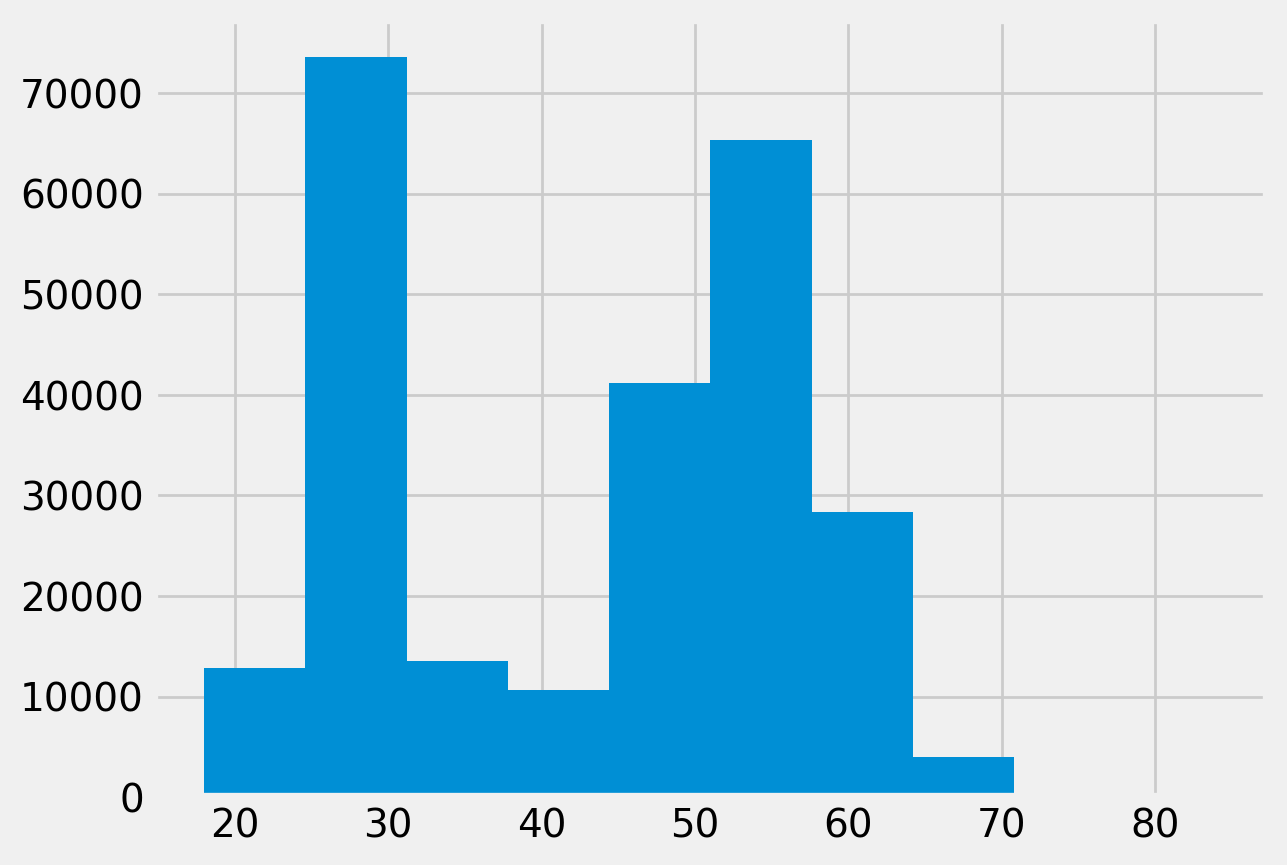

In [7]:
plt.hist(popages)

In [8]:
sample=popages.sample(n=500, random_state=5)
print(sample.mean())
print(sample.std())


0    41.832
dtype: float64
0    13.163218
dtype: float64


In [9]:
sample_chol_levels = [66.0, 36.0, 73.0, 48.0, 81.0, 69.0, 75.0, 81.0, 73.0,69.0, 101.0, 70.0, 50.0, 42.0, 36.0, 71.0, 65.0, 43.0, 76.0, 24.0]
chol_levels=np.array(sample_chol_levels)
chol_levels

array([ 66.,  36.,  73.,  48.,  81.,  69.,  75.,  81.,  73.,  69., 101.,
        70.,  50.,  42.,  36.,  71.,  65.,  43.,  76.,  24.])

In [10]:
chol_levels_mean=np.mean(sample_chol_levels)
chol_levels_mean

np.float64(62.45)

In [11]:
chol_levels_std=np.std(sample_chol_levels, ddof=1)
chol_levels_std

np.float64(19.209304214912432)

In [12]:
#standard error
chol_levels_se=chol_levels_std/(np.sqrt(len(sample_chol_levels)))
chol_levels_se

np.float64(4.295331002501743)

In [13]:
#confidence interval
ct=stats.t.interval(confidence=0.95, df=len(sample_chol_levels)-1, loc=chol_levels_mean, scale=chol_levels_se)
ct

(np.float64(53.4597688901183), np.float64(71.44023110988171))

In [ ]:
#weight of people.  10 values between 55 and 75  sample mean , stanadr dev, standard error 
#you need 4 arguments 
#confidence levels 
#sample standard deviation
#sample standard mean
#standard error
#(n-1)
sample_weights=[56.2,61.0, 69.0, 55.0, 81.0, 73.0,69.0, 66.0,72.5, 60.0]
weights=np.array(sample_weights)
weights


array([56.2, 61. , 69. , 55. , 81. , 73. , 69. , 66. , 72.5, 60. ])

In [ ]:
#the sample mean
sample_weights_mean=np.mean(sample_weights)
sample_weights_mean

np.float64(66.27000000000001)

In [21]:
weights.mean()

np.float64(66.27000000000001)

In [17]:
#standard deviation
sample_weights_std=np.std(sample_weights, ddof=1)
sample_weights_std

np.float64(8.243253133455397)

In [18]:
#standard error
sample_weights_se=sample_weights_std/(np.sqrt(len(sample_weights)))
sample_weights_se

np.float64(2.6067455231038994)

In [20]:
#confidence interval
confidenceweight=stats.t.interval(confidence=0.95, df=len(sample_weights)-1, loc=sample_weights_mean, scale=sample_weights_se)
confidenceweight

(np.float64(60.373131943172666), np.float64(72.16686805682735))

In [ ]:
data=pd.read_csv(r"tested.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [28]:
sample_data=data.sample(n=100, random_state=34)
sample_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
131,1023,0,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C
181,1073,0,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,83.1583,E52,C
306,1198,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S
380,1272,0,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.7500,NaN,Q
263,1155,1,3,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,NaN,S


In [30]:
sample_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
131,1023,0,1,"Gracie, Col. Archibald IV",male,53.0,0,0,113780,28.5000,C51,C
181,1073,0,1,"Compton, Mr. Alexander Taylor Jr",male,37.0,1,1,PC 17756,83.1583,E52,C
306,1198,0,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.5500,C22 C26,S
380,1272,0,3,"O'Connor, Mr. Patrick",male,NaN,0,0,366713,7.7500,NaN,Q
263,1155,1,3,"Klasen, Miss. Gertrud Emilia",female,1.0,1,1,350405,12.1833,NaN,S


In [31]:
sample_data['Age']=sample_data['Age'].fillna(sample_data['Age'].median())
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 131 to 142
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  100 non-null    int64  
 1   Survived     100 non-null    int64  
 2   Pclass       100 non-null    int64  
 3   Name         100 non-null    object 
 4   Sex          100 non-null    object 
 5   Age          100 non-null    float64
 6   SibSp        100 non-null    int64  
 7   Parch        100 non-null    int64  
 8   Ticket       100 non-null    object 
 9   Fare         100 non-null    float64
 10  Cabin        30 non-null     object 
 11  Embarked     100 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 10.2+ KB


In [32]:
age=sample_data['Age']

In [33]:
#population mean
mu=data['Age'].mean()
mu

np.float64(30.272590361445783)

In [34]:
xbar=age.mean()
xbar

np.float64(30.6992)

In [35]:
sd=np.std(age, ddof=1)
sd

np.float64(13.329074447093527)

In [37]:
se=sd/ (np.sqrt(len(age)))
se

np.float64(1.3329074447093527)

In [40]:
age_confidence_interval=stats.t.interval(confidence=0.99, df=len(age)-1, loc=xbar, scale=se)
age_confidence_interval

(np.float64(27.198444613165115), np.float64(34.19995538683489))

In [ ]:
#statistical significance 